每类车辆推荐通行时间（秒）： [32.70393922 15.62430372  5.99650765  5.67524941]
最大通行车辆总数： 96.83724292455781


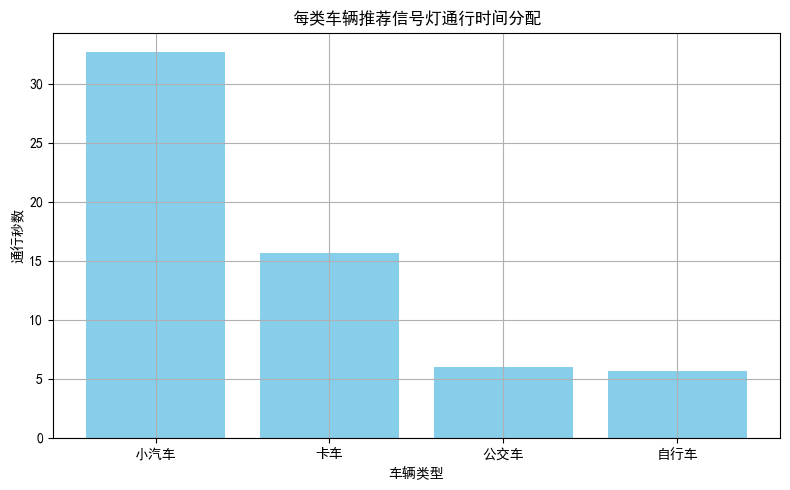

In [3]:
# 🚦 交通信号灯通行优化（线性规划）

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False 

# 1. 读取数据（通畅状态下的车辆结构）
df = pd.read_csv("C:/Users/Administrator/Desktop/交通数据_两个月_含时间字段.csv")
smooth_df = df[df['交通状况'] == 'normal']

# 2. 计算每类车辆的平均数量（通畅状态）
avg = {
    '小汽车数量': smooth_df['小汽车数量'].mean(),
    '卡车数量': smooth_df['卡车数量'].mean(),
    '公交车数量': smooth_df['公交车数量'].mean(),
    '自行车数量': smooth_df['自行车数量'].mean()
}
total_avg = sum(avg.values())

# 3. 计算每类车辆的最大推荐通行时间（按比例分60秒）
max_time = {k: (v / total_avg) * 60 for k, v in avg.items()}

# 4. 设置通行效率（单位：辆/秒）
efficiency = [2.0, 1.0, 1.5, 1.2]  # 小汽车, 卡车, 公交车, 自行车

# 5. 构造线性规划模型
c = -np.array(efficiency)  # 目标函数系数（取负用于最大化）
A = [
    [1, 1, 1, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
]
b = [60] + [max_time[k] for k in avg.keys()]
bounds = [(0, None)] * 4

# 6. 求解线性规划
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# 7. 输出最优结果
vehicle_labels = ['小汽车', '卡车', '公交车', '自行车']
optimal_time = res.x
print("每类车辆推荐通行时间（秒）：", optimal_time)
print("最大通行车辆总数：", -res.fun)

# 8. 可视化结果
plt.figure(figsize=(8, 5))
plt.bar(vehicle_labels, optimal_time, color='skyblue')
plt.title("每类车辆推荐信号灯通行时间分配")
plt.ylabel("通行秒数")
plt.xlabel("车辆类型")
plt.grid(True)
plt.tight_layout()
plt.show()
